In [1]:
import sys,os,time

import tables as tb
import yaml
import numpy as np
from matplotlib import colors
norm = colors.LogNorm()
import matplotlib.pyplot as plt

import tjmonopix.tjmonopix
import tjmonopix.scans.source_scan as source_scan
import tjmonopix.scans.th_scan as th_scan

DUtoe=20

# Electrical tests

In [2]:
chip=tjmonopix.tjmonopix.TJMonoPix(
    conf="/home/user/workspace/tjmonopix/tjmonopix_30/tjmonopix/tjmonopix_mio3.yaml",
    no_power_reset=False)
chip.init()

2019-11-29 13:03:47,060 [INFO ] (MainThread) GPAC: power reset
2019-11-29 13:03:48,477 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 8
2019-11-29 13:03:48,555 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2019-11-29 13:03:48,644 [INFO ] (MainThread) ibias = 45
2019-11-29 13:03:48,646 [INFO ] (MainThread) ibias = 503.125nA
2019-11-29 13:03:48,913 [INFO ] (MainThread) {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7782266489468406, 'VDDP OC': False, 'VDDA [mA]': 28.571291504250468, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 77.77742784697587, 'BiasSF [V]': 1.0715224676578945, 'VDDD OC': False, 'VPC [mA]': 0.0915003766934811, 'VPCSWSF [mA]': -0.07738715460517194, 'VDDA [V]': 1.7855088356713427, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}


In [5]:
# reset configuration
chip.default_conf()
chip.reset_ibias()

2019-11-29 12:21:02,237 [INFO ] (MainThread) ibias = 45
2019-11-29 12:21:02,239 [INFO ] (MainThread) ibias = 503.125nA


In [3]:
####### CONFIGURE THE FRONT END ######
# INPUT baseline
chip.set_vreset_dacunits(43,1) #1V
# OUTPUT BASELINE
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias
# INOUT RESET rate
chip.set_ireset_dacunits(10,0,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01
# OUTPUT RESET rate
chip.set_ithr_dacunits(10,1) #680pA
# BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(28,1) #500nA
# DC current of Amp, OUTPUT RISE TIME
chip.set_ibias_dacunits(45,1) #500nA
chip.write_conf()

2019-11-29 13:03:58,900 [INFO ] (MainThread) vreset = 1.1644488189V
2019-11-29 13:03:58,902 [INFO ] (MainThread) icasn = 0
2019-11-29 13:03:58,903 [INFO ] (MainThread) icasn = 4.375nA
2019-11-29 13:03:58,905 [INFO ] (MainThread) ireset = 10 low leakage mode
2019-11-29 13:03:58,906 [INFO ] (MainThread) ireset = 3.759765625pA, low leakage mode
2019-11-29 13:03:58,908 [INFO ] (MainThread) ithr = 10
2019-11-29 13:03:58,909 [INFO ] (MainThread) ithr = 1.50390625nA
2019-11-29 13:03:58,911 [INFO ] (MainThread) idb = 28
2019-11-29 13:03:58,912 [INFO ] (MainThread) idb = 507.5nA
2019-11-29 13:03:58,914 [INFO ] (MainThread) ibias = 45
2019-11-29 13:03:58,915 [INFO ] (MainThread) ibias = 503.125nA


In [4]:
#### (optional) check analog output
chip.enable_analog(col="all")
chip.set_inj_all(inj_n=0)  ## run this cell with inj_n=1 to stop injection
chip.inject()

2019-11-29 12:20:32,279 [INFO ] (MainThread) vl = 1.00862204724V
2019-11-29 12:20:32,281 [INFO ] (MainThread) vh = 1.50468503937V


2019-11-29 13:04:01,829 [INFO ] (MainThread) auto_mask th=2 step=10 exp=0.200000 fl=EN_PMOS
2019-11-29 13:04:03,175 [INFO ] (MainThread) Enable MASKH 10 Noise data 5
2019-11-29 13:04:03,176 [INFO ] (MainThread) Number of noisy pixels: 2
2019-11-29 13:04:03,400 [INFO ] (MainThread) Enable MASKH 20 Noise data 1
2019-11-29 13:04:03,402 [INFO ] (MainThread) Number of noisy pixels: 2
2019-11-29 13:04:03,625 [INFO ] (MainThread) Enable MASKH 30 Noise data 0
2019-11-29 13:04:03,627 [INFO ] (MainThread) Number of noisy pixels: 2
2019-11-29 13:04:03,850 [INFO ] (MainThread) Enable MASKH 40 Noise data 86
2019-11-29 13:04:03,852 [INFO ] (MainThread) Number of noisy pixels: 3
2019-11-29 13:04:04,076 [INFO ] (MainThread) Enable MASKH 50 Noise data 74
2019-11-29 13:04:04,078 [INFO ] (MainThread) Number of noisy pixels: 12
2019-11-29 13:04:04,302 [INFO ] (MainThread) Enable MASKH 60 Noise data 365
2019-11-29 13:04:04,303 [INFO ] (MainThread) Number of noisy pixels: 14
2019-11-29 13:04:04,528 [INFO ] 

2019-11-29 13:04:15,887 [INFO ] (MainThread) Enable MASKD 210 Noise data 3
2019-11-29 13:04:15,889 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:16,117 [INFO ] (MainThread) Enable MASKD 220 Noise data 1
2019-11-29 13:04:16,119 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:16,349 [INFO ] (MainThread) Enable MASKD 230 Noise data 1
2019-11-29 13:04:16,350 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:16,579 [INFO ] (MainThread) Enable MASKD 240 Noise data 2
2019-11-29 13:04:16,581 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:16,810 [INFO ] (MainThread) Enable MASKD 250 Noise data 0
2019-11-29 13:04:16,812 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:17,041 [INFO ] (MainThread) Enable MASKD 260 Noise data 0
2019-11-29 13:04:17,043 [INFO ] (MainThread) Number of noisy pixels: 113
2019-11-29 13:04:17,270 [INFO ] (MainThread) Enable MASKD 270 Noise data 13
2019-11-29 13:04:17,272 [INFO ] (Mai

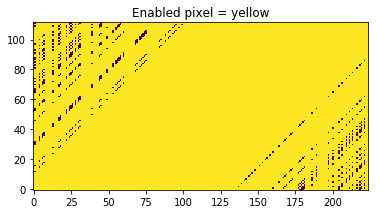

In [4]:
#### enable pixels and mask noisy pixels
chip.set_monoread()
noisy=chip.auto_mask()

mask=chip.get_pixel_status(mask=None,mode="all")
plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[3,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");

In [ ]:
### check power status (VDDD < several mA, VDDP roughly 80mA)
chip.get_power_status()

In [ ]:
### select one pixel
col=20
row=20
chip.enable_injection(chip.fl_n, col, row)
#chip.enable_pixel(chip.fl_n,col,row) 
#chip.enable_hitor(chip.fl_n,col,row)
mask=chip.get_pixel_status(mask=None,mode="all")
print "preamp of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="preamp")[chip.fl_n, col, row]
print "inj of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="inj")[chip.fl_n, col, row]
print "hitor of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="mon")[chip.fl_n, col, row]

In [ ]:
### (optional) inject 1 pixel. it is good idea to run this once/twice.
chip.set_inj_all(inj_n=1000,inj_phase=0)
#chip.reset_ibias()
chip.set_monoread()
chip.inject()
time.sleep(1)
dat=chip.interpret_data(chip['fifo'].get_data())
print "n of data", len(dat)
if len(dat)!=0:
    uni,cnt=np.unique(dat[["col",'row']], return_counts=True)
    arg=np.argsort(cnt)
    for a in arg[::-1]:
        print uni[a],cnt[a]

2019-11-29 12:28:50,162 [INFO ] (MainThread) vl = 1.00862204724V
2019-11-29 12:28:50,164 [INFO ] (MainThread) vh = 1.50468503937V
2019-11-29 12:28:50,168 [INFO ] (MainThread) Initializing ThScan
2019-11-29 12:28:50,448 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3007325834999997, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7772265476429288, 'VDDP OC': False, 'VDDA [mA]': 24.489678443681203, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5000079, 'VDDP [mA]': 86.86829602730414, 'BiasSF [V]': 1.0730224200526315, 'VDDD OC': False, 'VPC [mA]': -0.15200059444040706, 'VPCSWSF [mA]': -0.004522615231221412, 'VDDA [V]': 1.792503862725451, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-11-29 12:28:50,648 [INFO ] (MainThread) Temperature: 30.4 C
2019-11-29 12:28:50,679 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 12:28:50,680 [INFO ] (MainThread) Creating socket connection to serv

0 149132 100.000% 0.002s 49711hits 0errs
data (inj_n 1000,inj_loop 35): INJ=35000 MONO=14711 MON=0
0 49711 100.000% 0.003s 14711hits 0errs
delete_noninjected from 14711 to 14705 to 14705 99.959 percent
delete_cetainvalue from 14705 to 14705 100.000 percent
fit mu=3.960e+02(19.8003DU) sigma=1.020e+01(0.5101DU)


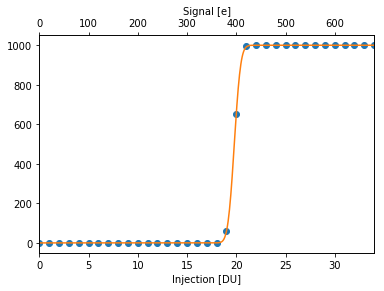

In [18]:
### S-curve
chip.set_inj_all(inj_n=1000,inj_phase=0)
reload(th_scan)
scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(row,row+1,1), ## list of rows
           collist=np.arange(col,col+1,1), ## list of columns
           n_mask_col=1,                   ## maximum number of columns which are injected at once
           injlist=np.arange(0,35)         ## scan values of test pulse amplitude in DU
           )                               ## do not change
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist
    fit=f.root.ScurveFit[:]
fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
ax=[ax]
cnts=cnts[np.bitwise_and(cnts['col']==col,cnts['row']==row)]
fit=fit[np.bitwise_and(fit['col']==col,fit['row']==row)][0]
cnt=np.zeros(len(inj))
for c in cnts:
    cnt[np.argwhere(inj==c["inj"])[0][0]]=c['cnt']
x,y=tjmonopix.analysis.utils.scurve_from_fit(th=inj,n=500,
        reverse=False,A_fit=fit["A"],mu_fit=fit["mu"],sigma_fit=fit['sigma'])
ax[0].plot(inj,cnt,"o")
ax[0].plot(x,y,"-")
ax2=ax[0].twiny()
ax[0].set_xbound(np.min(inj),np.max(inj))
ax2.set_xbound(np.min(inj)*DUtoe,np.max(inj)*DUtoe)
ax[0].set_xlabel("Injection [DU]")
ax2.set_xlabel("Signal [e]")
print "fit mu=%.3e(%.4fDU)"%(fit["mu"]*DUtoe,fit["mu"]),
print "sigma=%.3e(%.4fDU)"%(fit["sigma"]*DUtoe,fit["sigma"])

In [19]:
## Threshold scan 1col=~1.5min
chip.set_inj_all(inj_n=100,inj_phase=0)
reload(th_scan)
scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(0,224,1), ## list of rows
           collist=np.arange(0,112,10), ## list of columns change here (0,112,1) for full scan
           n_mask_col=1,                   ## max number of columns to be injected
           injlist=np.arange(0,35),        ## scan values of test pulse amplitude in DU
           debug=4)                        
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

2019-11-29 12:30:03,212 [INFO ] (MainThread) vl = 1.00862204724V
2019-11-29 12:30:03,214 [INFO ] (MainThread) vh = 1.50468503937V
2019-11-29 12:30:03,218 [INFO ] (MainThread) Initializing ThScan
2019-11-29 12:30:03,488 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7772265476429288, 'VDDP OC': False, 'VDDA [mA]': 24.489678443681203, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 7.585704998729309e-08, 'VPCSWSF [V]': 0.5000079, 'VDDP [mA]': 86.86829602730414, 'BiasSF [V]': 1.0725224359210523, 'VDDD OC': False, 'VPC [mA]': 0.2775011185041718, 'VPCSWSF [mA]': -0.017587980912067713, 'VDDA [V]': 1.792503862725451, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-11-29 12:30:03,687 [INFO ] (MainThread) Temperature: 30.5 C
2019-11-29 12:30:03,723 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 12:30:03,725 [INFO ] (MainThread) Creating socket connection to ser

0 40138361 100.000% 0.453s 13379454hits 0errs
data (inj_n 100,inj_loop 7840): INJ=7016489 MONO=2983511 MON=0
0 9999999 74.741% 0.545s 2983487hits 0errs
data (inj_n 100,inj_loop 7840): INJ=2391512 MONO=987943 MON=0
9999999 3379455 100.000% 0.789s 987933hits 0errs
delete_noninjected from 3971420 to 3967942 to 3967929 99.912 percent
delete_cetainvalue from 3967929 to 3967929 100.000 percent


/home/user/workspace/tjmonopix/tjmonopix_30/tjmonopix/analysis/utils.py:73: RuntimeWarning: invalid value encountered in sqrt
  err=np.sqrt(np.diag(cov))


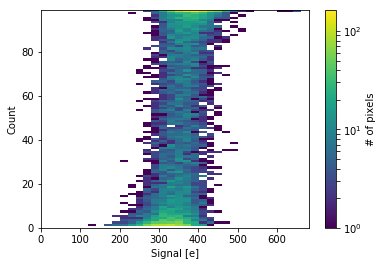

In [11]:
with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist

fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
hist=ax.hist2d(cnts['inj']*DUtoe,cnts['cnt'], bins=[inj*DUtoe,np.arange(100)],norm=norm)
cb=fig.colorbar(hist[3], ax=ax)
cb.set_label("# of pixels")
ax.set_ylabel("Count")
ax.set_xlabel("Signal [e]");


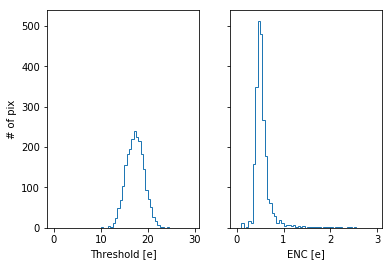

In [13]:
with tb.open_file(fev) as f:
    fit=f.root.ScurveFit[:]
DUtoe=1
fig,ax=plt.subplots(ncols=2,nrows=1,sharey=True)
ax[0].hist(fit['mu']*DUtoe,bins=np.arange(0,30,0.5)*DUtoe,histtype="step")
ax[1].hist(fit['sigma']*DUtoe,bins=np.arange(0,3,0.05)*DUtoe,histtype="step")
ax[0].set_ylabel("# of pix")
ax[0].set_xlabel("Threshold [e]")
ax[1].set_xlabel("ENC [e]");

2019-11-29 13:16:02,222 [INFO ] (MainThread) Initializing SourceScan
2019-11-29 13:16:02,489 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7782266489468406, 'VDDP OC': False, 'VDDA [mA]': 24.999880076252367, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 86.36324779506369, 'BiasSF [V]': 1.0730224200526315, 'VDDD OC': False, 'VPC [mA]': -0.16100063033447276, 'VPCSWSF [mA]': -0.0010050167786858693, 'VDDA [V]': 1.792503862725451, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-11-29 13:16:02,687 [INFO ] (MainThread) Temperature: 30.7 C
2019-11-29 13:16:02,715 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 13:16:02,717 [INFO ] (MainThread) Creating socket connection to server tcp://127.0.0.1:5500
2019-11-29 13:16:02,719 [INFO ] (MainThread) ScanBase.start:data_send.data_send_init connect

/home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191129_131602_source_scan.h5
0 1418 100.000% 0.000s 473hits


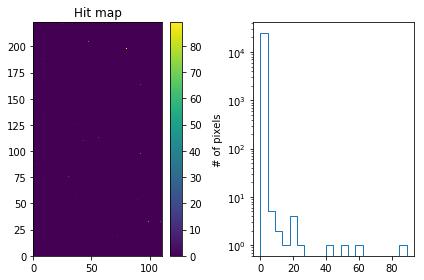

In [14]:
## noise occupancy
reload(source_scan)
scan=source_scan.SourceScan(dut=chip)
scan.start(scan_time=100,                                ## scan time in seconds
           with_mon=False,with_rx1=False,with_tlu=False) ## do not change
fhit=scan.analyze(scan.output_filename,event_build="none",clusterize=False)
scan.stop()
with tb.open_file(fhit) as f:
    hits=f.root.Hits[:]
fig,ax=plt.subplots(ncols=2,nrows=1)
hist=ax[0].hist2d(hits['col'],hits['row'],bins=[np.arange(0,112),np.arange(0,224)]);
fig.colorbar(hist[3],ax=ax[0])
ax[1].hist(np.reshape(hist[0],[-1]),histtype="step",bins=20)
ax[1].set_yscale("log")
ax[0].set_title("Hit map");
ax[1].set_ylabel("# of pixels");
fig.tight_layout()

# Source scan

In [ ]:
### (optional) load setting from confiuration file
with open("NgapW4R22.yaml") as f:
    conf=yaml.safe_load(f)
#chip=tjmonopix.tjmonopix.TJMonoPix(
#    conf=conf['dut']['file'],
#    no_power_reset=True)
#chip.init()    
    
chip.default_conf()
chip.switch_flavor(conf["dut"]['flavor'])
chip.enable_pixel(chip.fl_n,col=-1,row=-1,mask=conf['mask'])
chip.reset_ibias()

chip.set_vreset_dacunits(conf['dut']['vreset_dacunits'],1) #
chip.set_icasn_dacunits(conf['dut']['icasn_dacunits'],1) 
chip.set_ireset_dacunits(conf['dut']['ireset_dacunits']['value'],conf['dut']['ireset_dacunits']['mode'],1)
chip.set_ithr_dacunits(conf['dut']['ithr_dacunits'],1)
chip.set_idb_dacunits(conf['dut']['idb_dacunits'],1)
chip.set_ibias_dacunits(conf['dut']['ibias_dacunits'],1)
chip.reset_ibias()

In [ ]:
## Fe
## online monitor
## % start_online_monitor ../tjmonopix/online_monitor.yaml

reload(source_scan)
scan=source_scan.SourceScan(dut=chip)
scan.start(scan_time=1000,                                ## scan time in seconds
           with_mon=False,with_rx1=False,with_tlu=False) ## do not change
fhit=scan.analyze(scan.output_filename,event_build="token",clusterize=True)
scan.stop()